In [1]:
import torch
print(torch.__version__)

0.5.0a0+4251e38


In [2]:
x = torch.rand(2,3)
y = torch.zeros(2,3)
print('Tensor x ',x.type(), x.size())
print(x)
print('-----------')
print('Tensor y ',y.type(), y.size())
print(y)

Tensor x  torch.FloatTensor torch.Size([2, 3])
tensor([[ 0.2900,  0.9794,  0.6998],
        [ 0.6826,  0.4490,  0.6558]])
-----------
Tensor y  torch.FloatTensor torch.Size([2, 3])
tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])


In [3]:
import numpy as np
x1 = np.ndarray(shape=(2,3), dtype=int,buffer=np.array([1,2,3,4,5,6]))
x2 = torch.from_numpy(x1)
print(x2.type(),x2.size())
print(x2)

torch.LongTensor torch.Size([2, 3])
tensor([[ 1,  2,  3],
        [ 4,  5,  6]])


In [4]:
x3 = x2.numpy()
print(x3.dtype,x3.shape)
print(x3)

int64 (2, 3)
[[1 2 3]
 [4 5 6]]


In [5]:
#Indexing and Slicing
# torch.index_select(input, dim, index)

x = torch.rand(2,3)
out1 = torch.index_select(x,1,torch.LongTensor([0,1]))
out2 = x[:,0:2]
print('x=',x)
print('out1=',out1)
print('out2=',out2)

x= tensor([[ 0.8271,  0.9153,  0.1823],
        [ 0.3718,  0.5318,  0.0101]])
out1= tensor([[ 0.8271,  0.9153],
        [ 0.3718,  0.5318]])
out2= tensor([[ 0.8271,  0.9153],
        [ 0.3718,  0.5318]])


# Math

In [6]:
x1 = torch.FloatTensor([[1,2],[4,5]])
x2 = torch.FloatTensor([[1,2],[4,5]])
add = torch.add(x1,x2)
print('add op',add)
print('direct add',x1+x2)

x3 = torch.FloatTensor(4,4)
eigen_value = torch.eig(x3) # torch.eig(a,eigenvectors=False) -> eigen_value, eigen_vector
print("eigen values",eigen_value)

add op tensor([[  2.,   4.],
        [  8.,  10.]])
direct add tensor([[  2.,   4.],
        [  8.,  10.]])
eigen values (tensor([[ 0.0000e+00,  0.0000e+00],
        [-6.5430e+16,  0.0000e+00],
        [-2.7031e+15,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00]]), tensor([]))


# AutoGrad

In [7]:
import torch
from torch.autograd import Variable
x_tensor = torch.Tensor(3,4)
x_variable = Variable(x_tensor)
print("default value for 'requires_grad' =", x_variable.requires_grad)
x_variable = Variable(x_tensor,requires_grad=True)
print("After manually setting it to true =",x_variable.requires_grad)

default value for 'requires_grad' = False
After manually setting it to true = True


In [8]:
x = Variable(torch.FloatTensor(3,4),requires_grad=True)
y = 3*x +1
z = 2*y +3

print(x.requires_grad,y.requires_grad,z.requires_grad)

True True True


In [9]:
gradient = torch.FloatTensor(3,4)
z.backward(gradient)

print(x.grad)
y.grad,z.grad

tensor([[-3.9105e+17,  2.7383e-40, -3.9105e+17,  2.7383e-40],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


(None, None)

# Linear Regression

In [10]:
# Reading data
import pandas
dataset=pandas.read_csv('datasets/linear_dataset.csv')
x=np.expand_dims(dataset.values[:,0].astype(np.float32),axis=1)
y=np.expand_dims(dataset.values[:,1].astype(np.float32),axis=1)
xt=torch.from_numpy(x)
yt=torch.from_numpy(y)

In [11]:
# imports
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable

In [12]:
# Model definition
model = nn.Linear(1,1)
output = model(Variable(xt))
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

In [13]:
# training
loss_arr =[]
label = Variable(yt)
for i in range(1000): #number of epoches
    output = model(Variable(xt))
    optimizer.zero_grad()

    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(loss)
    loss_arr.append(loss.data.numpy().tolist())

tensor(5.7759)
tensor(0.3554)
tensor(0.3380)
tensor(0.3214)
tensor(0.3038)
tensor(0.2886)
tensor(0.2702)
tensor(0.2630)
tensor(0.2482)
tensor(0.2211)


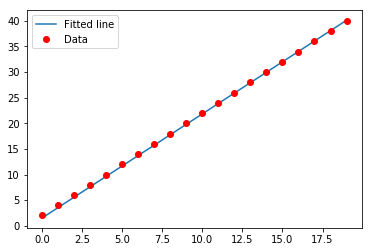

In [15]:
# plot the fitted model y=mx+c
%matplotlib inline
param_list = list(model.parameters())
m,c=param_list[0].data.numpy().tolist(),param_list[1].data.numpy().tolist()

import matplotlib.pyplot as plt
plt.plot( m * x + c, label='Fitted line')
plt.plot(y, 'ro', label='Data')
plt.legend()
plt.show()